In [1]:
# imports
import pandas as pd
import numpy as np

In [5]:
# load data
ts = pd.read_csv('../data/all_currencies.csv', index_col=0)
ts

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN
...,...,...,...,...,...,...,...,...
298,2018-09-23,ZZC,0.067149,0.067324,0.024069,0.024161,34.0,130705.0
299,2018-09-24,ZZC,0.024167,0.091875,0.024121,0.091631,58.0,47041.0
300,2018-09-25,ZZC,0.091528,0.091568,0.057507,0.090547,752.0,178158.0
301,2018-09-26,ZZC,0.090400,0.104745,0.086071,0.086559,60.0,175963.0


In [6]:
ts.columns

Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market Cap'],
      dtype='object')

In [7]:
ts['Market Cap'].isna().value_counts()

False    567841
True      64377
Name: Market Cap, dtype: int64

In [8]:
ts.Symbol.nunique()

887

In [9]:
ts.Symbol.value_counts()[-870:]

FRC      1868
IFC      1867
QRK      1856
PXC      1844
ZET      1840
         ... 
DACH        2
ANON        2
PHON        2
MNP         2
AZART       1
Name: Symbol, Length: 870, dtype: int64

In [10]:
# create dataframe of meta data
meta_data = pd.DataFrame(columns=['Symbol', 'Start Data', 'End Date', 'Value At Start', 'Value at End', 'ATH', 'ATL', 'Num_values'])

In [13]:
# dollar eda
df = ts[ts['Symbol']=='$$$']
df.Date[-1:]

1039    2018-09-27
Name: Date, dtype: object

In [14]:
df.shape[0]

1040

In [15]:
df.Close[-1:]

1039    0.000935
Name: Close, dtype: float64

In [16]:
# find start, end dates and number of data points for each coin
i=0
for coin in ts.Symbol.unique():
    # instantiate list to add to metadata frame
    my_list = [coin]
    df = ts[ts['Symbol'] == coin]

    # find start date
    my_list.append(df.Date[0])
    
    # find end date
    my_list.append(df.Date[-1:])
    
    # find starting value
    my_list.append(df.Open[0])

    # find ending value
    my_list.append(df.Close[-1:])

    # find all time high
    my_list.append(max(max(df.Open), max(df.Close)))

    # find all time low
    my_list.append(min(min(df.Open), min(df.Close)))

    # find number of entries
    my_list.append(df.shape[0])

    # add coin info to df
    meta_data.loc[i] = my_list
#     print(coin)
    i+=1
        
meta_data

,Symbol,Start Data,End Date,Value At Start,Value at End,ATH,ATL,Num_values
0,$$$,2015-11-12,"1039 2018-09-27 Name: Date, dtype: object",1.300000e-05,"1039 0.000935 Name: Close, dtype: float64",1.737900e-02,5.000000e-06,1040
1,$PAC,2015-11-02,"1052 2018-09-27 Name: Date, dtype: object",7.200000e-09,"1052 0.002622 Name: Close, dtype: float64",1.618900e-02,2.500000e-09,1053
2,1337,2015-11-09,"1053 2018-09-27 Name: Date, dtype: object",8.000000e-05,"1053 0.000075 Name: Close, dtype: float64",1.085000e-03,6.500000e-07,1054
3,2GIVE,2016-05-16,"864 2018-09-27 Name: Date, dtype: object",1.920000e-04,"864 0.003664 Name: Close, dtype: float64",3.958000e-02,9.200000e-05,865
4,42,2014-01-14,"1702 2018-09-27 Name: Date, dtype: object",1.013620e+06,"1702 24176.0 Name: Close, dtype: float64",1.013620e+06,2.072000e+01,1703
...,...,...,...,...,...,...,...,...
882,ZP,2018-08-20,"38 2018-09-27 Name: Date, dtype: object",7.362340e-01,"38 0.43237 Name: Close, dtype: float64",1.130000e+00,3.801200e-01,39
883,ZSE,2017-03-30,"545 2018-09-27 Name: Date, dtype: object",1.217860e-01,"545 0.009013 Name: Close, dtype: float64",3.640940e-01,1.748000e-03,546
884,ZUR,2016-05-09,"790 2018-09-25 Name: Date, dtype: object",5.500000e-05,"790 0.000513 Name: Close, dtype: float64",2.149700e-02,1.200000e-05,791
885,ZYD,2016-09-17,"717 2018-09-27 Name: Date, dtype: object",1.049100e-02,"717 0.00454 Name: Close, dtype: float64",2.101000e-02,8.930000e-04,718


In [17]:
coin = '$$$'
# instantiate list to add to metadata frame
my_list = [coin]
df = ts[ts['Symbol'] == coin]

# find start date
my_list.append(df.Date[0])
    
# find end date
my_list.append(max(df['Date']))
    
# find starting value
my_list.append(df.Open[0])

# find ending value
my_list.append(float(df['Close'][-1:]))

# find all time high
my_list.append(max(max(df.Open), max(df.Close)))

# find all time low
my_list.append(min(min(df.Open), min(df.Close)))

   # find number of entries
my_list.append(df.shape[0])

my_list

['$$$',
 '2015-11-12',
 '2018-09-27',
 1.3000000000000001e-05,
 0.000935,
 0.017379,
 5e-06,
 1040]

In [18]:
meta_data

,Symbol,Start Data,End Date,Value At Start,Value at End,ATH,ATL,Num_values
0,$$$,2015-11-12,"1039 2018-09-27 Name: Date, dtype: object",1.300000e-05,"1039 0.000935 Name: Close, dtype: float64",1.737900e-02,5.000000e-06,1040
1,$PAC,2015-11-02,"1052 2018-09-27 Name: Date, dtype: object",7.200000e-09,"1052 0.002622 Name: Close, dtype: float64",1.618900e-02,2.500000e-09,1053
2,1337,2015-11-09,"1053 2018-09-27 Name: Date, dtype: object",8.000000e-05,"1053 0.000075 Name: Close, dtype: float64",1.085000e-03,6.500000e-07,1054
3,2GIVE,2016-05-16,"864 2018-09-27 Name: Date, dtype: object",1.920000e-04,"864 0.003664 Name: Close, dtype: float64",3.958000e-02,9.200000e-05,865
4,42,2014-01-14,"1702 2018-09-27 Name: Date, dtype: object",1.013620e+06,"1702 24176.0 Name: Close, dtype: float64",1.013620e+06,2.072000e+01,1703
...,...,...,...,...,...,...,...,...
882,ZP,2018-08-20,"38 2018-09-27 Name: Date, dtype: object",7.362340e-01,"38 0.43237 Name: Close, dtype: float64",1.130000e+00,3.801200e-01,39
883,ZSE,2017-03-30,"545 2018-09-27 Name: Date, dtype: object",1.217860e-01,"545 0.009013 Name: Close, dtype: float64",3.640940e-01,1.748000e-03,546
884,ZUR,2016-05-09,"790 2018-09-25 Name: Date, dtype: object",5.500000e-05,"790 0.000513 Name: Close, dtype: float64",2.149700e-02,1.200000e-05,791
885,ZYD,2016-09-17,"717 2018-09-27 Name: Date, dtype: object",1.049100e-02,"717 0.00454 Name: Close, dtype: float64",2.101000e-02,8.930000e-04,718


In [20]:
import matplotlib.pyplot as plt

In [21]:
ath = meta_data.ATH
atl = meta_data.ATL
n = meta_data.Num_values

<ipython-input-26-8f322041c221>:6: UserWarning: Data has no values between 0 and 1, and therefore cannot be logit-scaled.
  ax.set_yscale('logit')


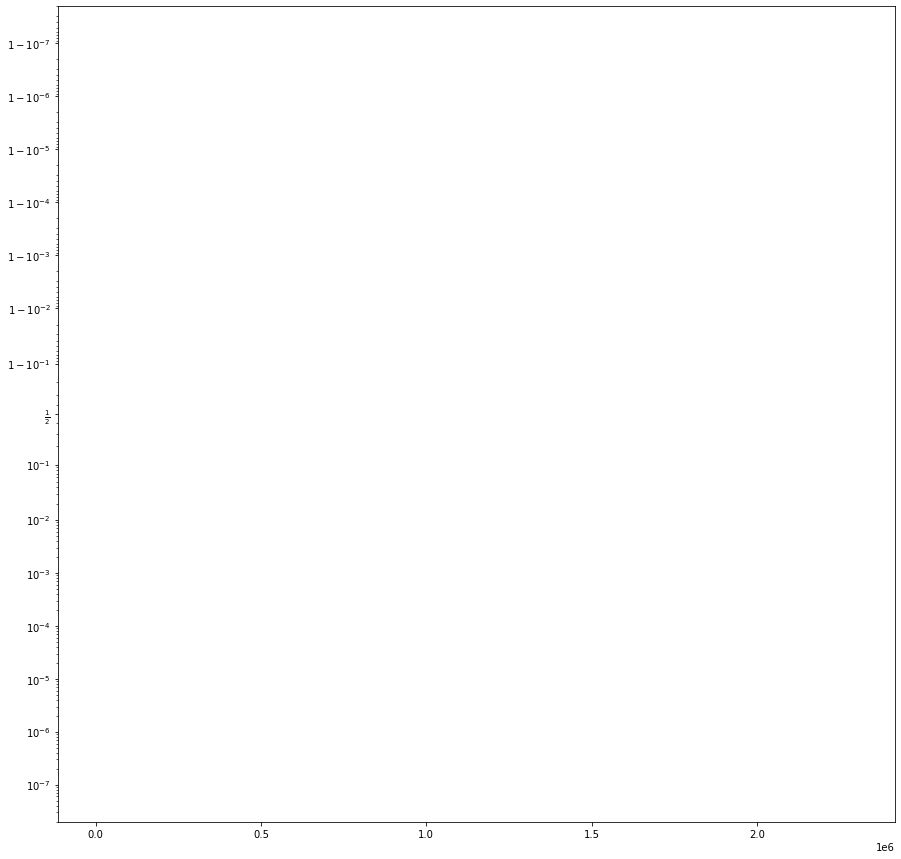

In [26]:


# plot ATH and ATL 
figsize = (15,15)
fig, ax = plt.subplots(figsize=figsize)

ax.scatter(ath, n)
ax.set_yscale('logit')